In [1]:
from compass import ModelTransfuser
from compass import ScoreBasedInferenceModel as SBIm

import torch
import numpy as np
import os

In [2]:
names = [name for name in os.listdir("data/big_MTf_model_comp/") if "checkpoint" in name]

In [3]:
MTf = ModelTransfuser(path="data/big_MTf_model_comp/")

In [4]:
for name in names[:2]:
    model = SBIm.load("data/big_MTf_model_comp/" + name, device="cuda")
    model_name = name.replace("_checkpoint.pt", "")
    MTf.add_model(model_name, model)

Model Karakas_net_yield_CL18_net_Seitenzahl added to transfuser.
Model Karakas_net_yield_Frischknecht16_net_Seitenzahl added to transfuser.


In [5]:
data = np.load("data/nissen_gce_data/nissen_solar.npy").T
data_std = np.load("data/nissen_gce_data/nissen_solar_std.npy").T

In [6]:
# Remove star 4, because time is negative
data = np.delete(data, 4, axis=0)
data_std = np.delete(data_std, 4, axis=0)

# Convert to torch tensors
data = torch.tensor(data, dtype=torch.float32)
data_std = torch.tensor(data_std, dtype=torch.float32)

# Nissen GCE provides Age, C, Fe, Mg, O and Si
# The models are trained on more elements, so we need to provide a mask to tell the model which data is available
condition_mask = torch.tensor([0,0,0,0,0,1,1,1,0,1,0,0,1,1], dtype=torch.float32)

In [8]:
MTf.compare(x=data, err=data_std, condition_mask=condition_mask)

/export/home/bguenes/anaconda3/envs/sbi-compass/lib/python3.13/site-packages/scipy/optimize/_numdiff.py:619: RuntimeWarning: invalid value encountered in divide
  J_transposed[i] = df / dx


Probabilities of the models after 71 observations:
Karakas_net_yield_CL18_net_Seitenzahl          : 100.00 %
Karakas_net_yield_Frischknecht16_net_Seitenzahl:   0.00 %

Model Karakas_net_yield_CL18_net_Seitenzahl fits the data best with a relative support of 100.0% among the considered models and could reject the null hypothesis decisively.


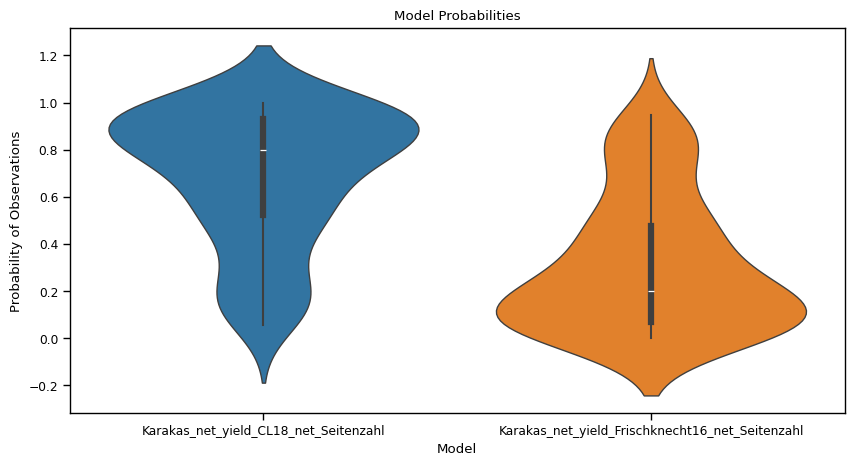

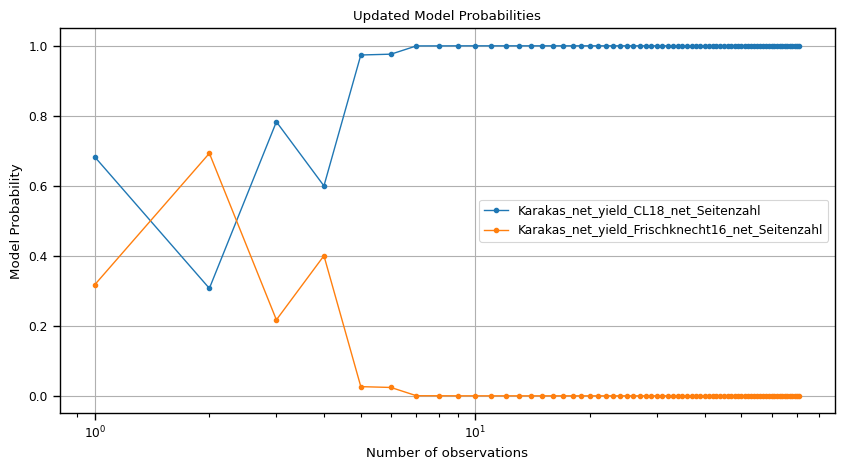

In [10]:
MTf.plots()